In [1]:
"""IMPORTING MODULES AND DATASET"""
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
import eeg_commons as egc
import Get_Connectivity_Networks as getCN
import numpy as np
import scipy
import mne

In [2]:
builtin_montages = mne.channels.get_builtin_montages(descriptions = True)
for montage_name, montage_description in builtin_montages:
    print(f"{montage_name}: {montage_description}")

standard_1005: Electrodes are named and positioned according to the international 10-05 system (343+3 locations)
standard_1020: Electrodes are named and positioned according to the international 10-20 system (94+3 locations)
standard_alphabetic: Electrodes are named with LETTER-NUMBER combinations (A1, B2, F4, …) (65+3 locations)
standard_postfixed: Electrodes are named according to the international 10-20 system using postfixes for intermediate positions (100+3 locations)
standard_prefixed: Electrodes are named according to the international 10-20 system using prefixes for intermediate positions (74+3 locations)
standard_primed: Electrodes are named according to the international 10-20 system using prime marks (' and '') for intermediate positions (100+3 locations)
biosemi16: BioSemi cap with 16 electrodes (16+3 locations)
biosemi32: BioSemi cap with 32 electrodes (32+3 locations)
biosemi64: BioSemi cap with 64 electrodes (64+3 locations)
biosemi128: BioSemi cap with 128 electrodes (1

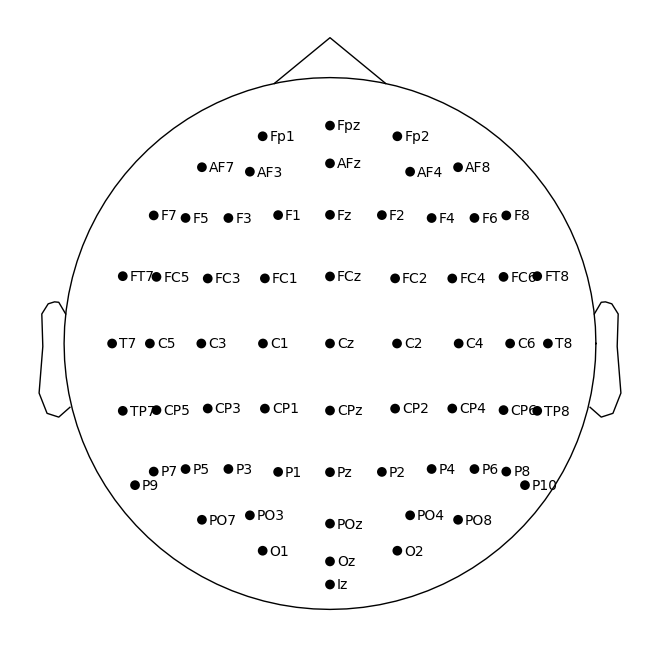

<DigMontage | 0 extras (headshape), 0 HPIs, 3 fiducials, 64 channels>


In [3]:
biosemi_montage = mne.channels.make_standard_montage("biosemi64")
biosemi_montage.plot()
print(biosemi_montage)

In [ ]:
subj_graph = getCN.GraphAdjacencyMatrix(subject = 4)
print(subj_graph)
print(subj_graph.shape)
import scipy
scipy.io.savemat(file_name = "subj_graph_1.mat", mdict = {'A': subj_graph})
avg_eeg = egc.FilteredSignals()
eeg = avg_eeg[4]
print(eeg.shape)
node_names =[
            "Fp1",
            "AF7",
            "AF3",
            "F1",
            "F3",
            "F5",
            "F7",
            "FT7",
            "FC5",
            "FC3",
            "FC1",
            "C1",
            "C3",
            "C5",
            "T7",
            "TP7",
            "CP5",
            "CP3",
            "CP1",
            "P1",
            "P3",
            "P5",
            "P7",
            "P9",
            "PO7",
            "PO3",
            "O1",
            "Iz",
            "Oz",
            "POz",
            "Pz",
            "CPz",
            "Fpz",
            "Fp2",
            "AF8",
            "AF4",
            "AFz",
            "Fz",
            "F2",
            "F4",
            "F6",
            "F8",
            "FT8",
            "FC6",
            "FC4",
            "FC2",
            "FCz",
            "Cz",
            "C2",
            "C4",
            "C6",
            "T8",
            "TP8",
            "CP6",
            "CP4",
            "CP2",
            "P2",
            "P4",
            "P6",
            "P8",
            "P10",
            "PO8",
            "PO4",
            "O2",
        ]
info = mne.create_info( node_names, 512, 'eeg')
print(info)
eeg = eeg*1/1000000 #pretty sure these measurements are in uV already

attempt_eeg = mne.EvokedArray(eeg, info)
print(attempt_eeg)
attempt_eeg.set_montage(biosemi_montage)

In [ ]:
"""THIS IS FOR IDENTIFYING HUB NODES ACROSS TIME"""
result_row = scipy.io.loadmat('results_rows.mat')
result_column = scipy.io.loadmat('results_columns.mat')
row = result_row['pred_rows'].squeeze()
column = result_column['pred_columns'].squeeze()
print(result_row['pred_rows'].squeeze())
print(column)

In [54]:
"""THIS IS FOR IDENTIFYING HUBNODES SPATIALLY"""
results = scipy.io.loadmat('results.mat')['hubnodes']

Below is the plot of patient 1:
Hubnodes are: ['P8']


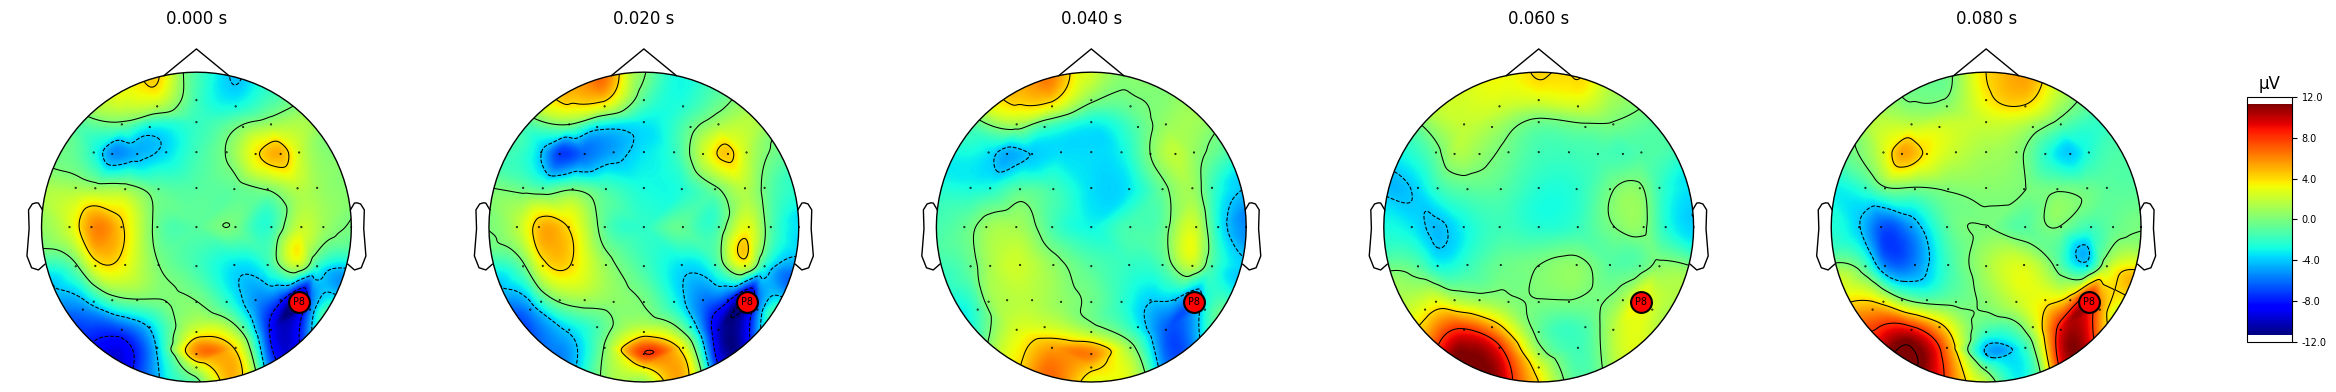

Below is the plot of patient 2:
Hubnodes are: ['FCz', 'P8', 'O2']


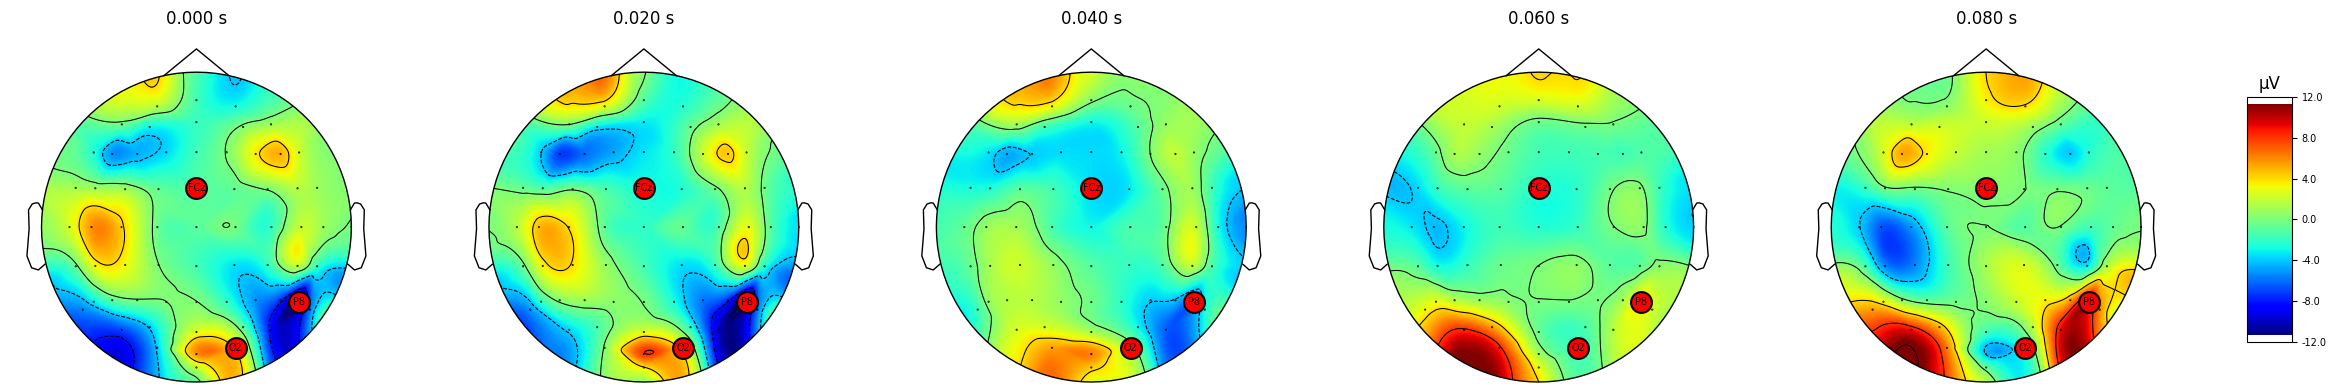

Below is the plot of patient 3:
Hubnodes are: ['AF7']


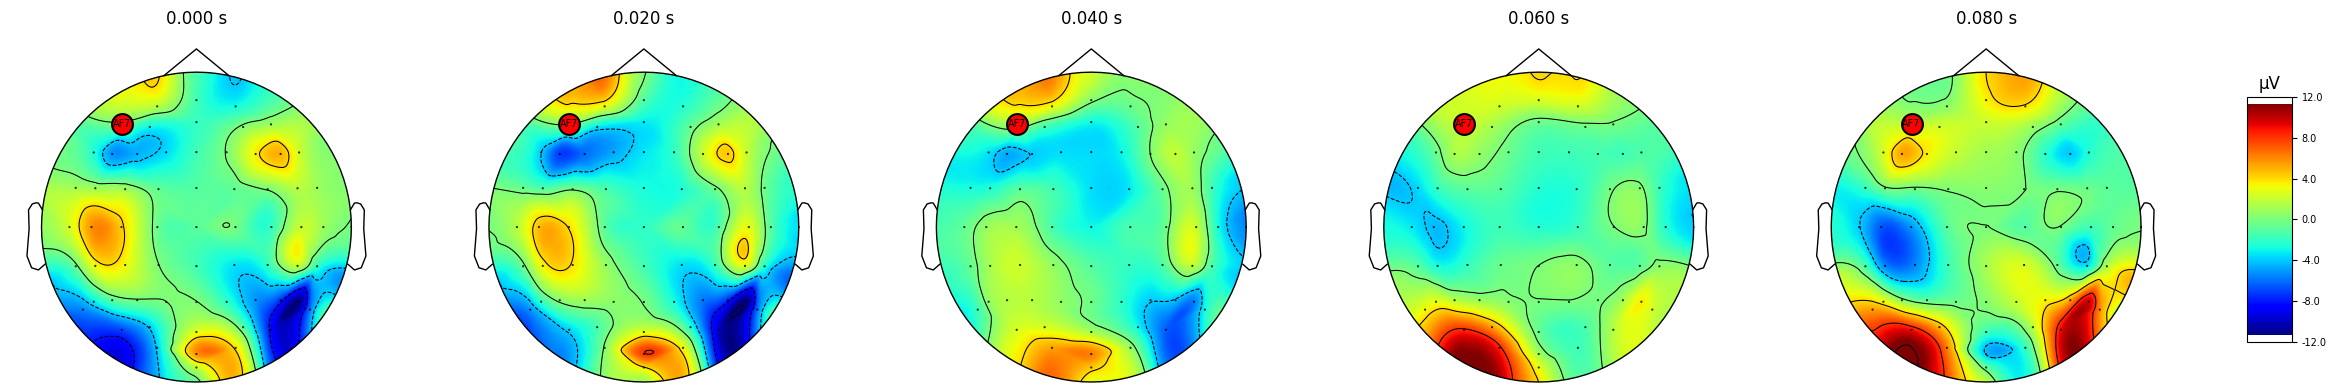

Below is the plot of patient 4:
Hubnodes are: ['FT8', 'FCz']


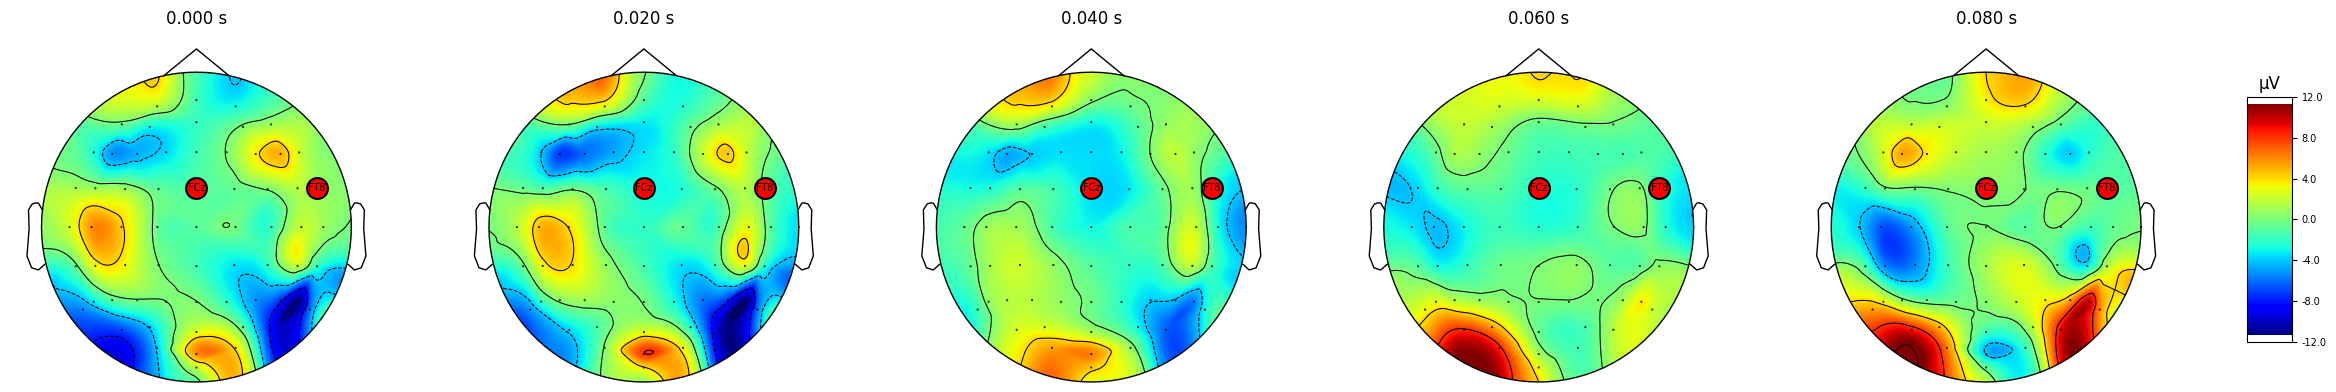

Below is the plot of patient 5:
Hubnodes are: ['P8', 'PO8']


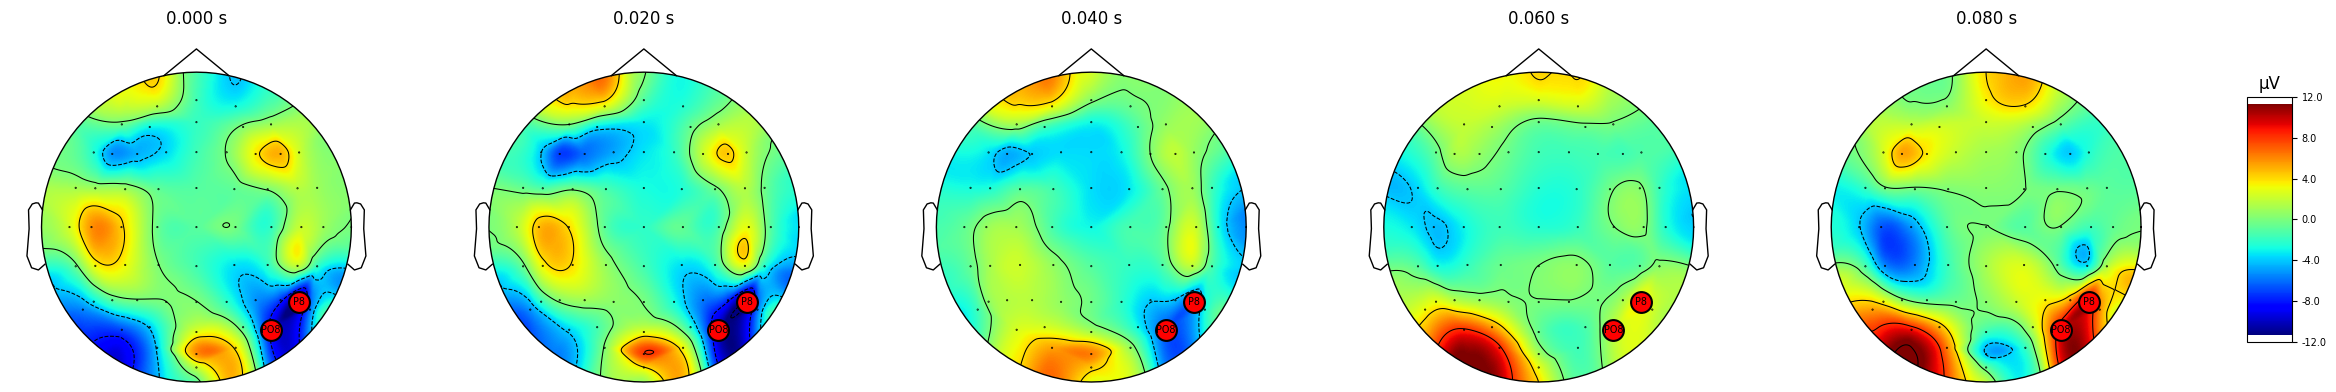

Below is the plot of patient 6:
Hubnodes are: ['PO7']


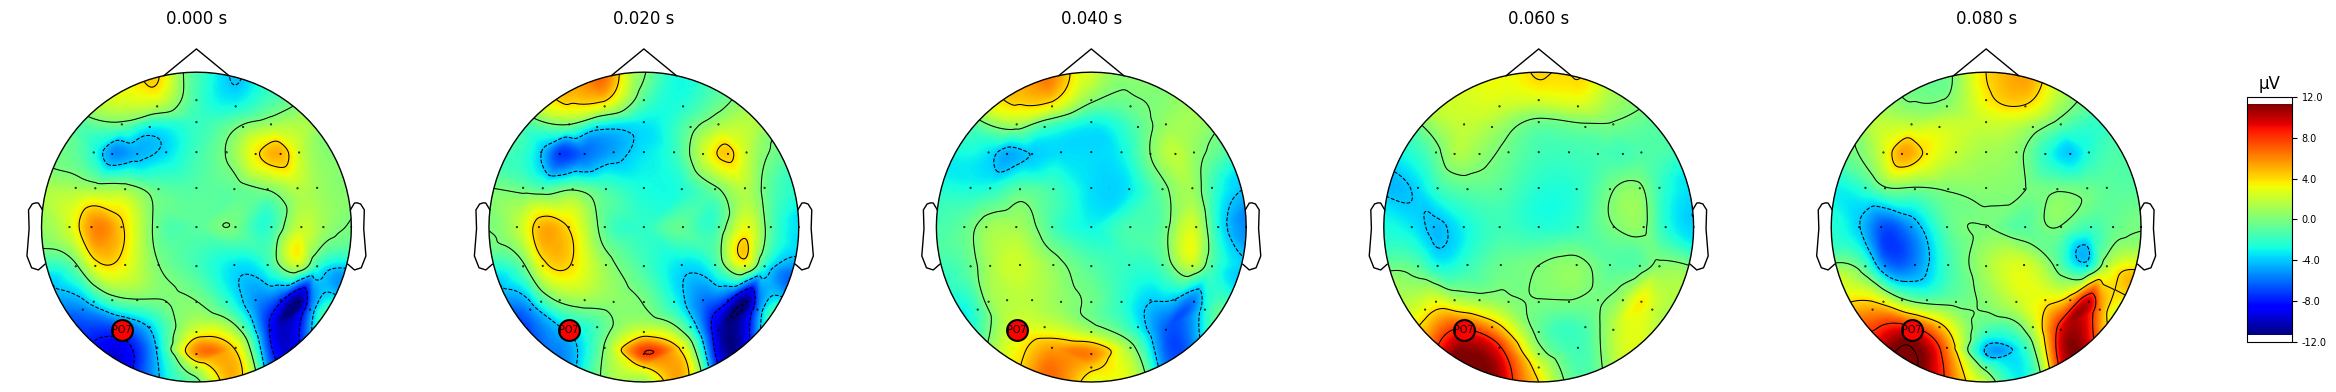

Below is the plot of patient 7:
Hubnodes are: ['F6', 'P6']


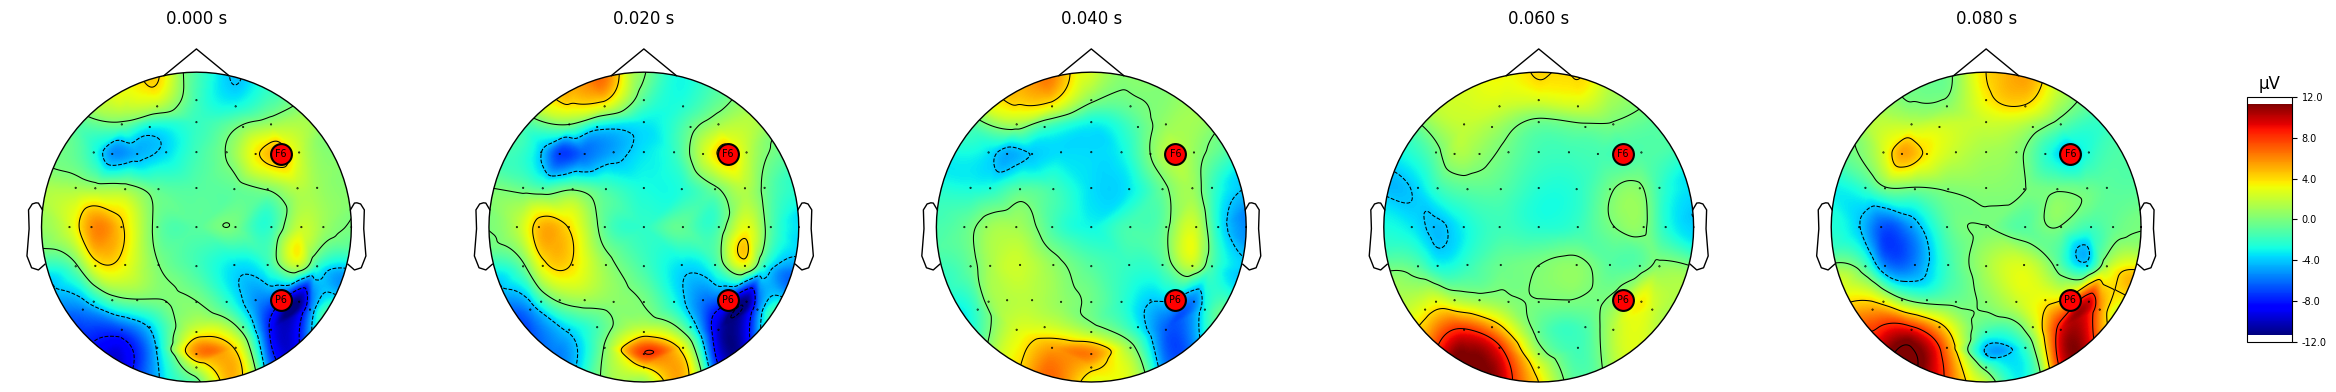

Below is the plot of patient 8:
Hubnodes are: ['CPz', 'P6']


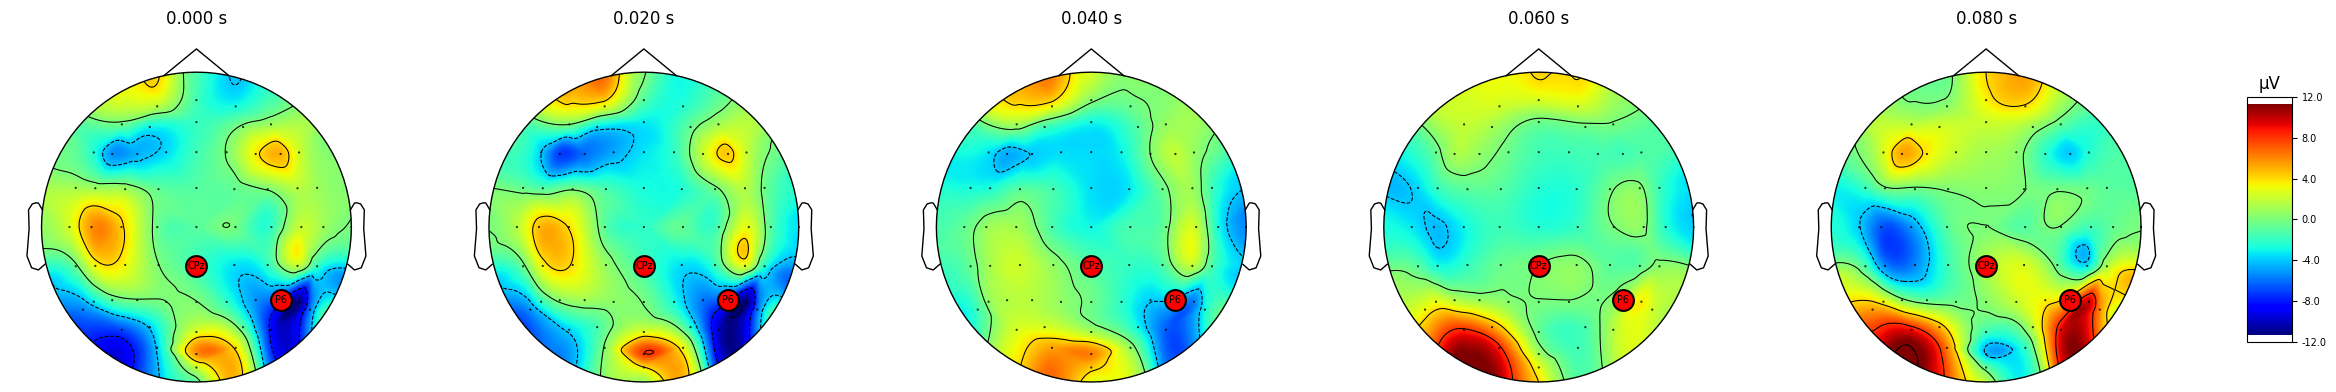

Below is the plot of patient 9:
Hubnodes are: ['FCz']


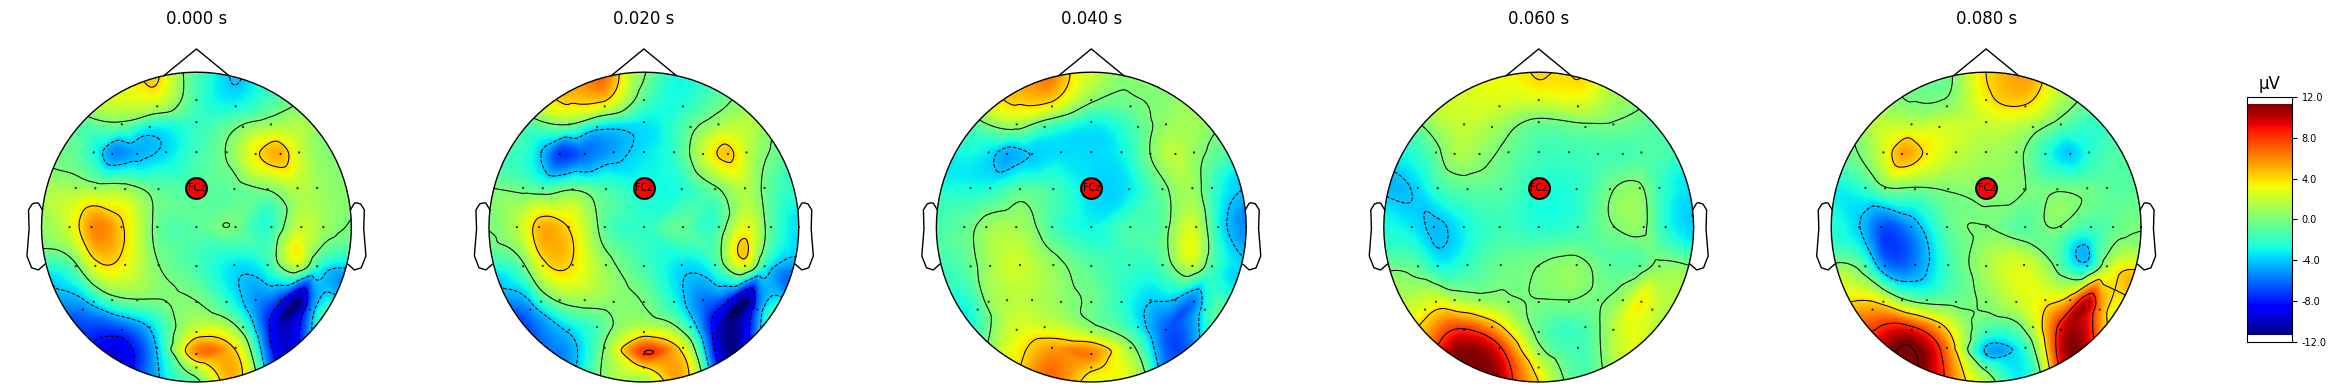

Below is the plot of patient 10:
Hubnodes are: ['FCz', 'P4']


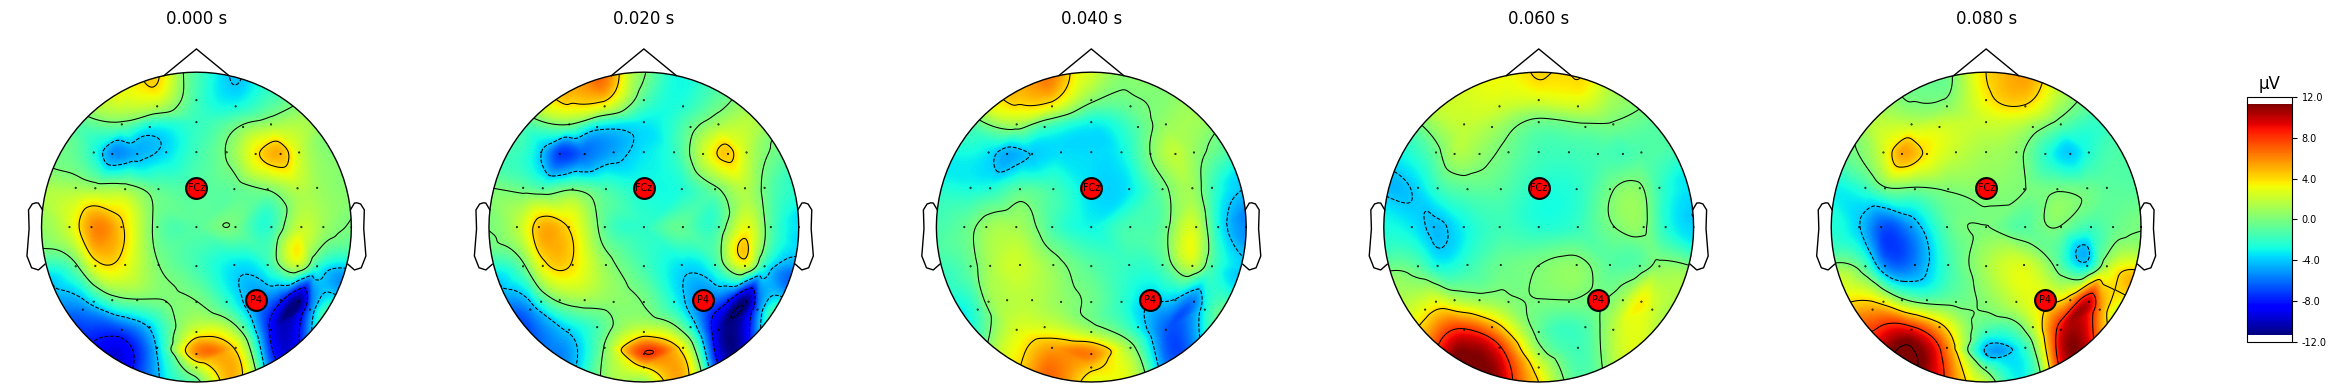

Below is the plot of patient 11:
Hubnodes are: ['FC4']


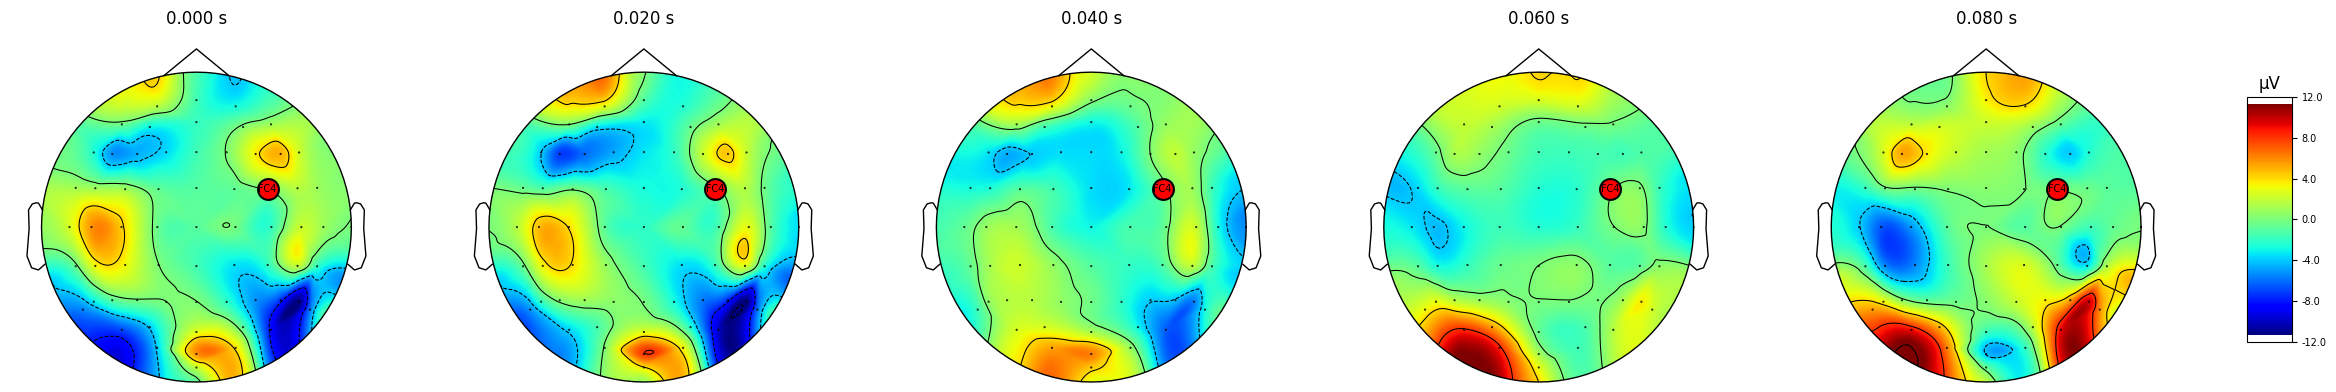

Below is the plot of patient 12:
Hubnodes are: ['Fp1', 'FCz']


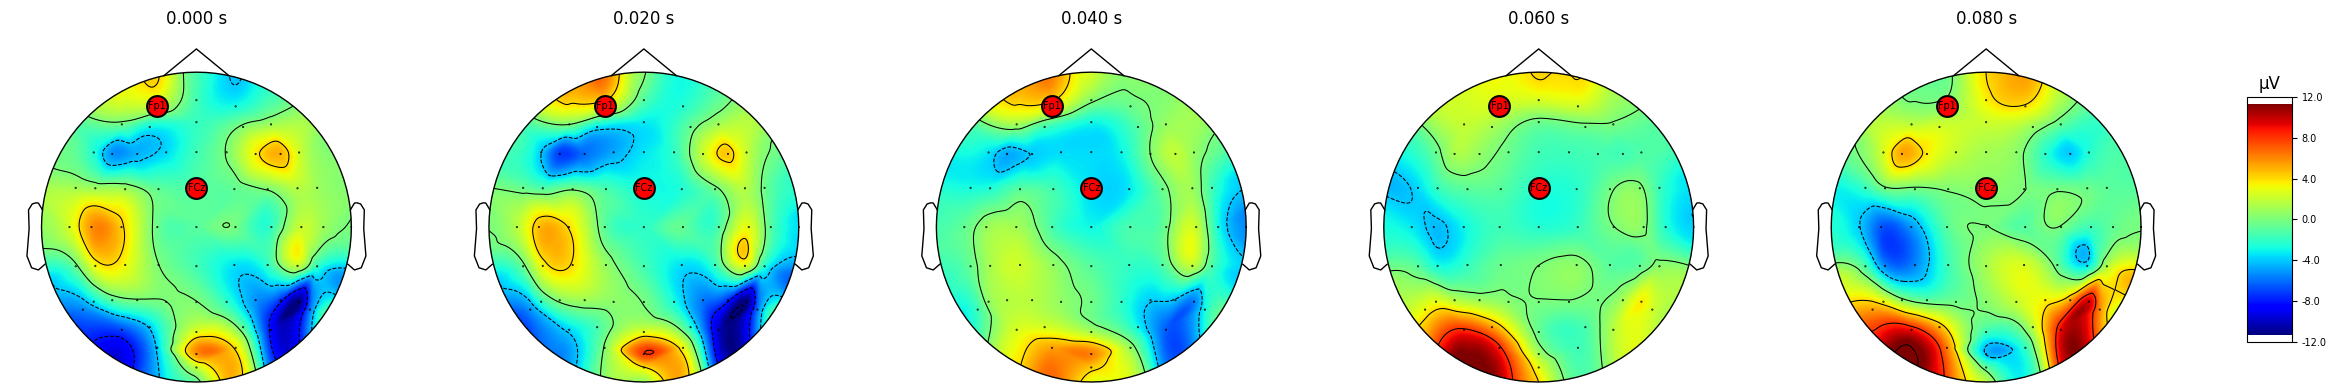

Below is the plot of patient 13:
Hubnodes are: ['FCz']


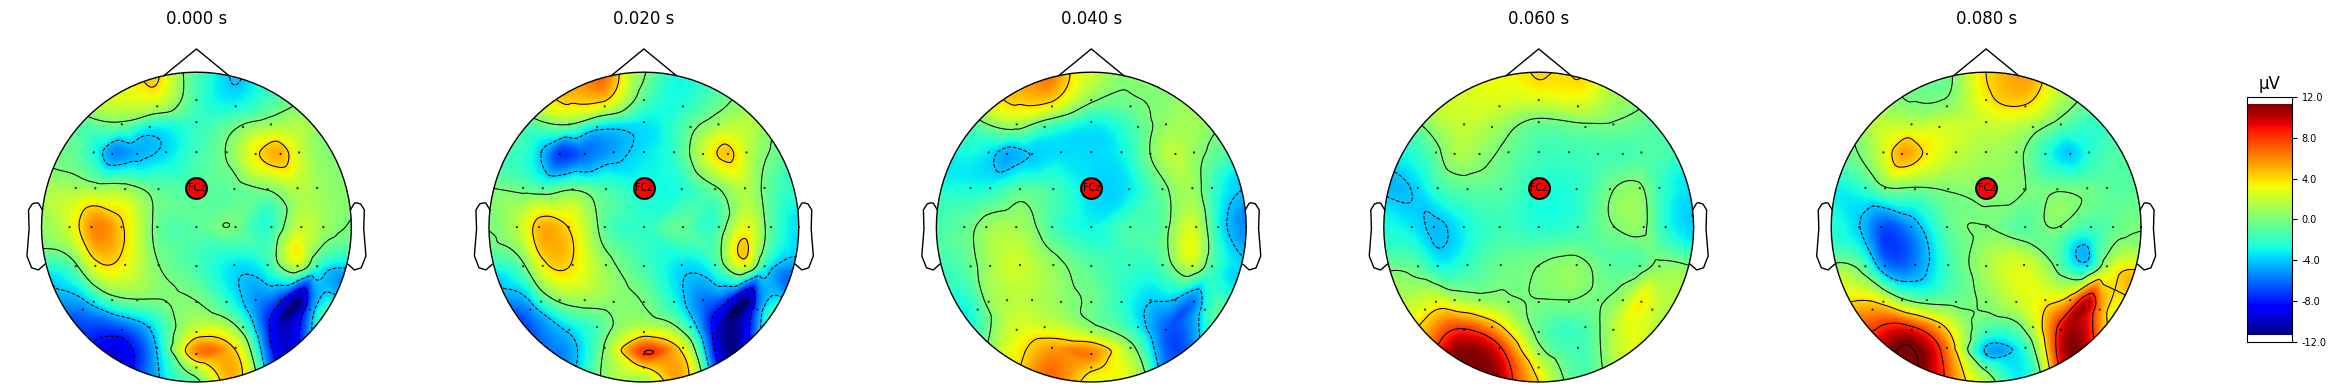

Below is the plot of patient 14:
Hubnodes are: ['C5']


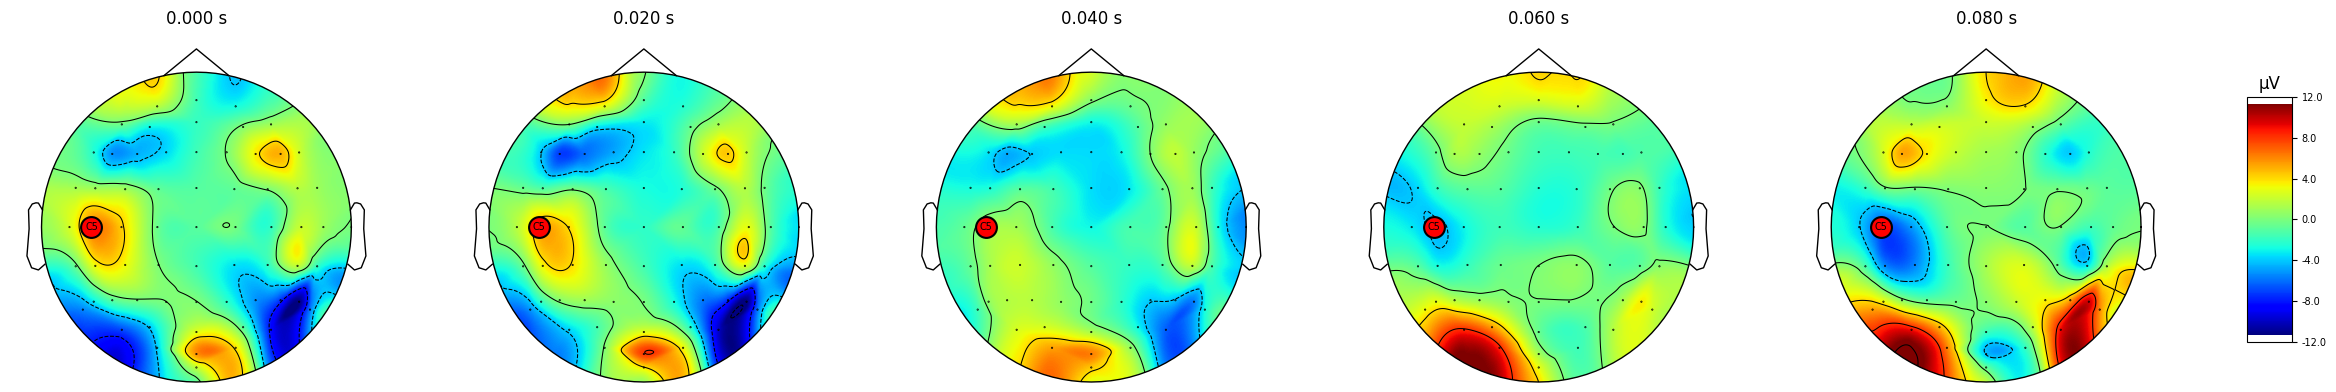

Below is the plot of patient 15:
Hubnodes are: ['FC2']


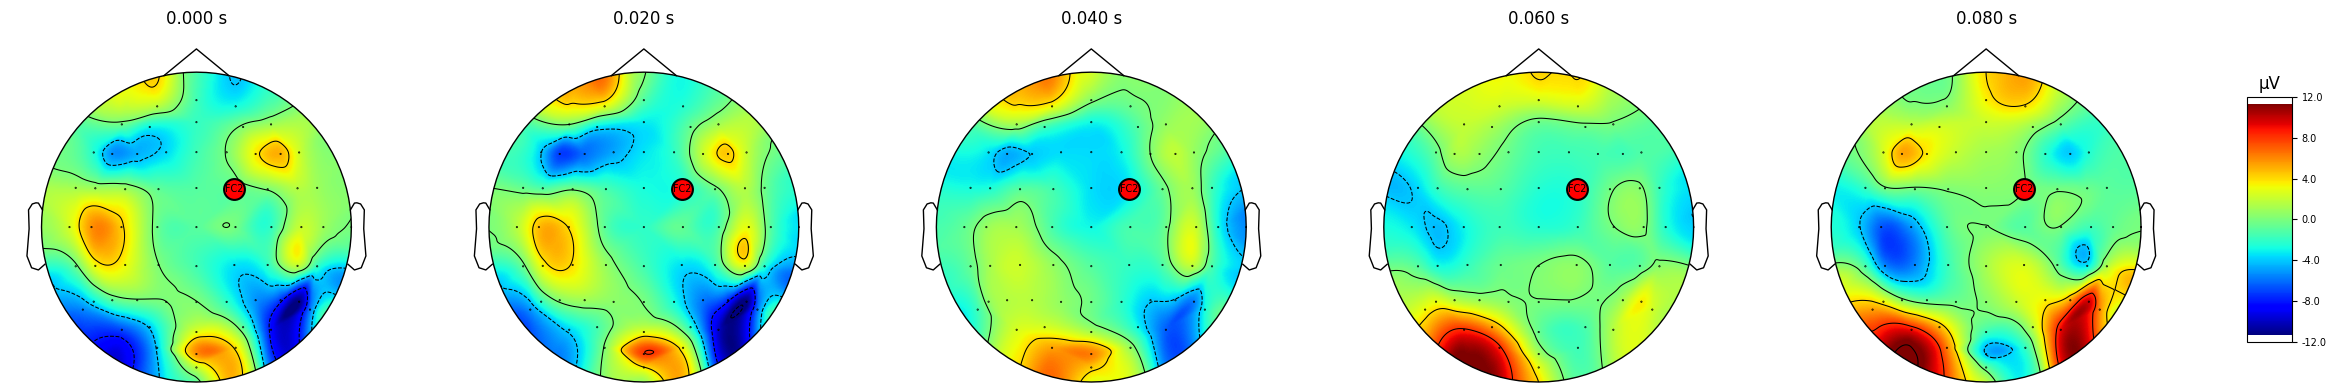

Below is the plot of patient 16:
Hubnodes are: ['AF3', 'Fp2', 'FCz']


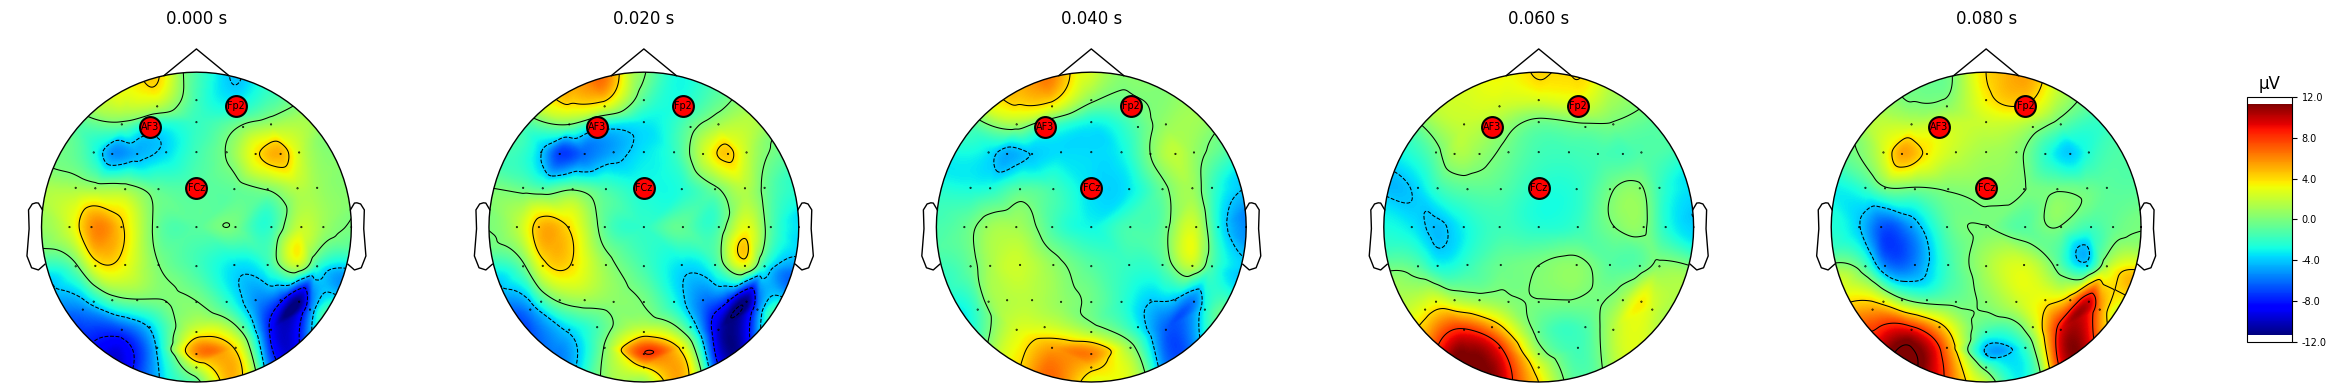

Below is the plot of patient 17:
Hubnodes are: ['FCz']


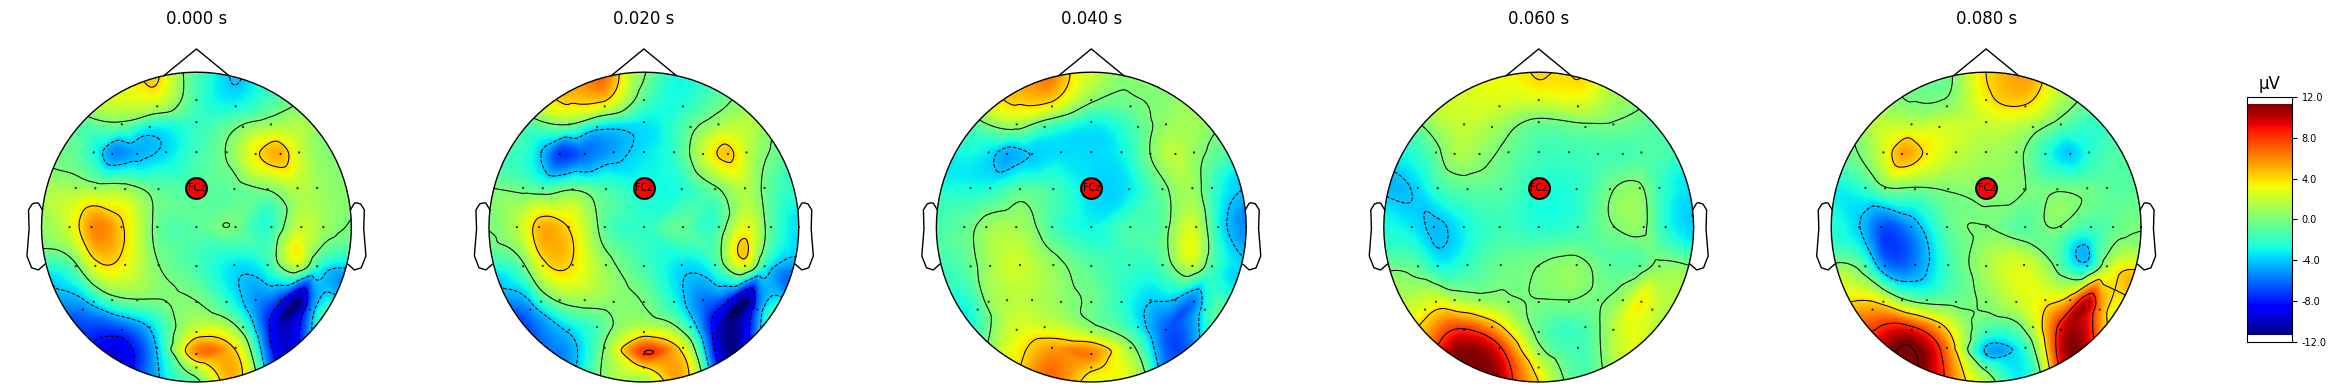

Below is the plot of patient 18:
Hubnodes are: ['Cz']


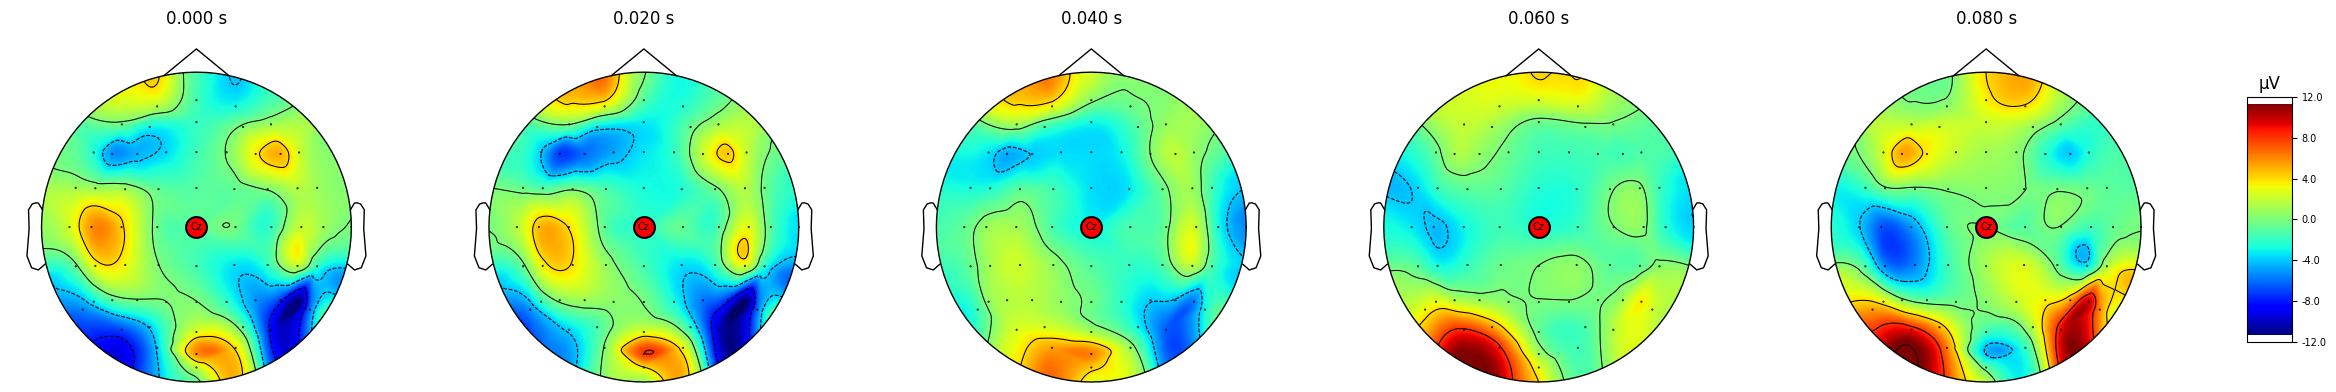

Below is the plot of patient 19:
Hubnodes are: ['FCz', 'C2']


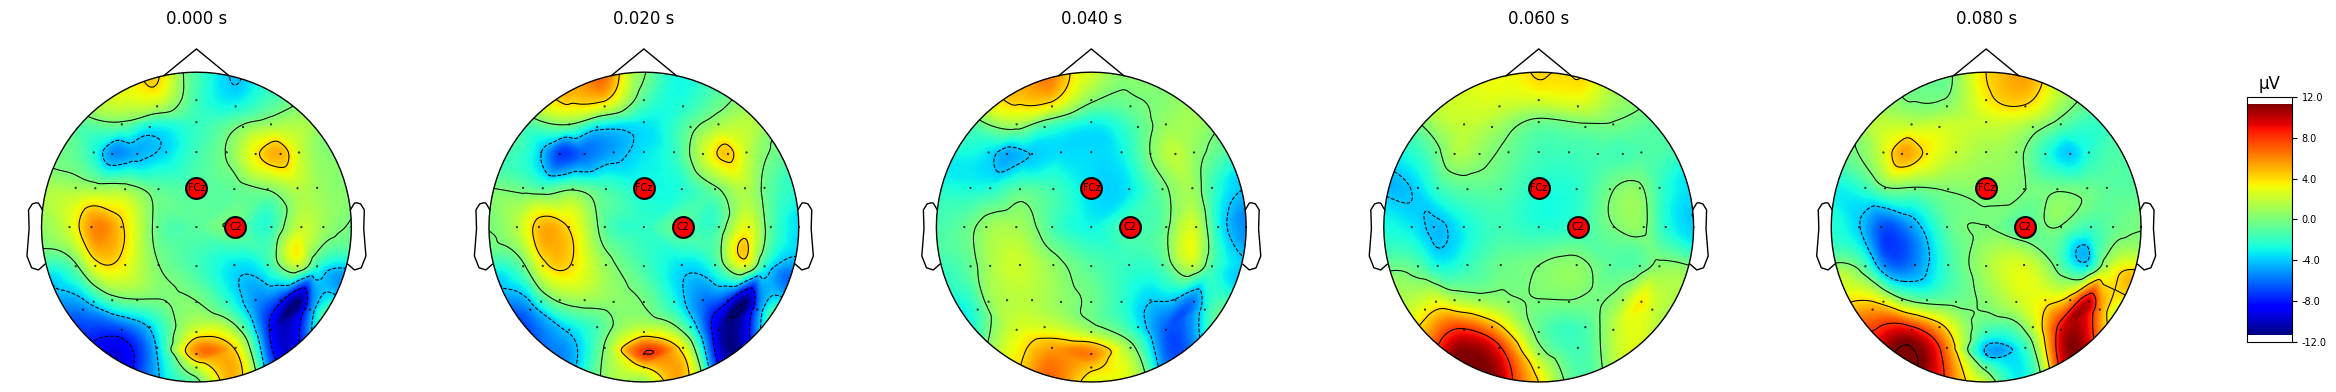

Below is the plot of patient 20:
Hubnodes are: ['AF7']


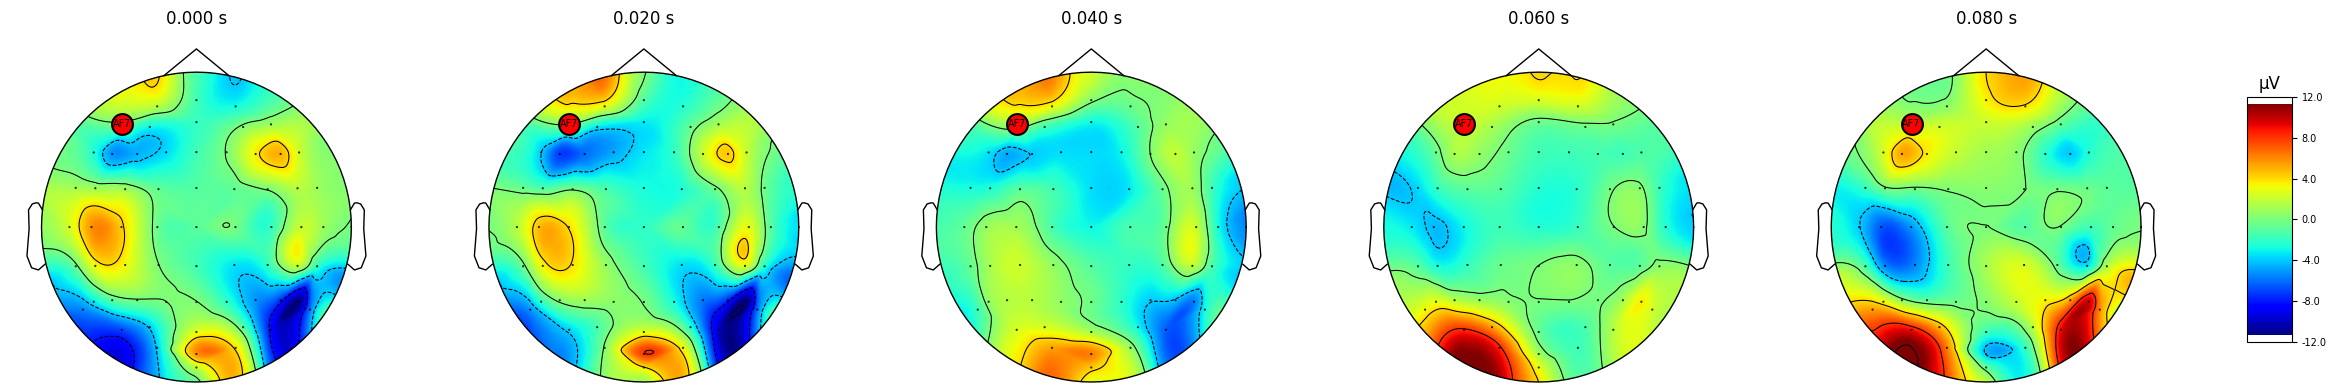

In [55]:
time = []
#for time_index, channel in enumerate(row):
    #highlight[channel-1][column[time_index]-1] = 1
for i in range(50):
    time.append(i*1/512)
for patient in range(20):
    print("Below is the plot of patient " + str(patient + 1) + ":")
    name_hub = []
    for index, value in enumerate(results[:, patient]):
        if value == 1:
            name_hub.append(node_names[index])
    print("Hubnodes are: " + str(name_hub))
    highlight = np.ones([50,64])
    highlight = np.transpose((highlight*results[:,patient]))
    attempt_eeg.plot_topomap(times = [0, 0.02, 0.04, 0.06, 0.08], ch_type = 'eeg', mask_params = dict(marker='o', markerfacecolor='r', markeredgecolor='k',
        linewidth=0, markersize=10), mask = highlight,  show_names = True, cmap = ('jet',0), res = 512, size = 3)